In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('Exam_Performance_Data.csv', sep=";")

# test scores will be summarized into a meta score, it might be interesting also to see which score is the most impactful
df["Test_Meta_Score"] = df["math score"] + df["reading score"] + df["writing score"]

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Test_Meta_Score
0,male,group A,high school,standard,completed,67,67,63,197
1,female,group D,some high school,free/reduced,none,40,59,55,154
2,male,group E,some college,free/reduced,none,59,60,50,169
3,male,group B,high school,standard,none,77,78,68,223
4,male,group E,associate's degree,standard,completed,78,73,68,219


In [3]:
# Datatypes and non-nulls. The data is already cleaned so there is no null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   Test_Meta_Score              1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [4]:
# Summary for nummerical columns
df.describe()

,math score,reading score,writing score,Test_Meta_Score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000,203.136000
std,15.402871,14.737272,15.600985,43.542732
min,13.000000,27.000000,23.000000,65.000000
25%,56.000000,60.000000,58.000000,175.750000
50%,66.500000,70.000000,68.000000,202.000000
75%,77.000000,79.000000,79.000000,235.000000
max,100.000000,100.000000,100.000000,300.000000


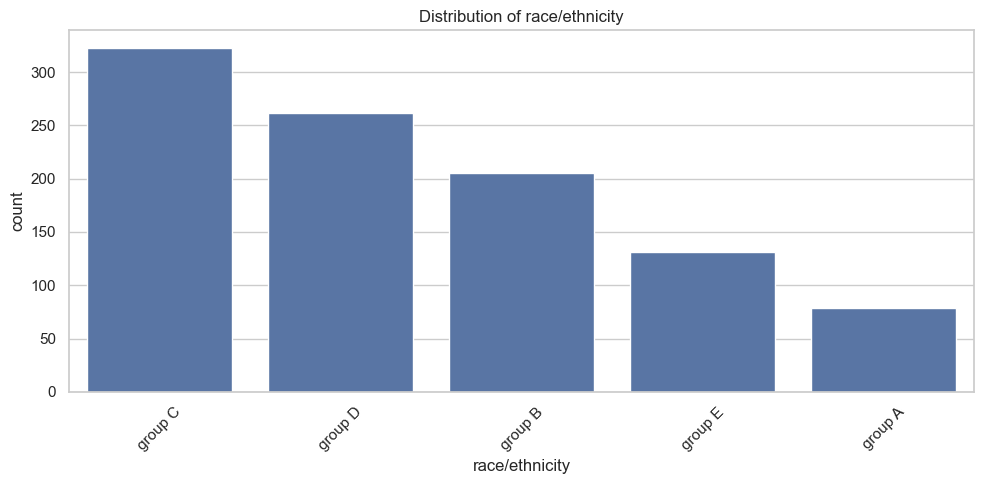

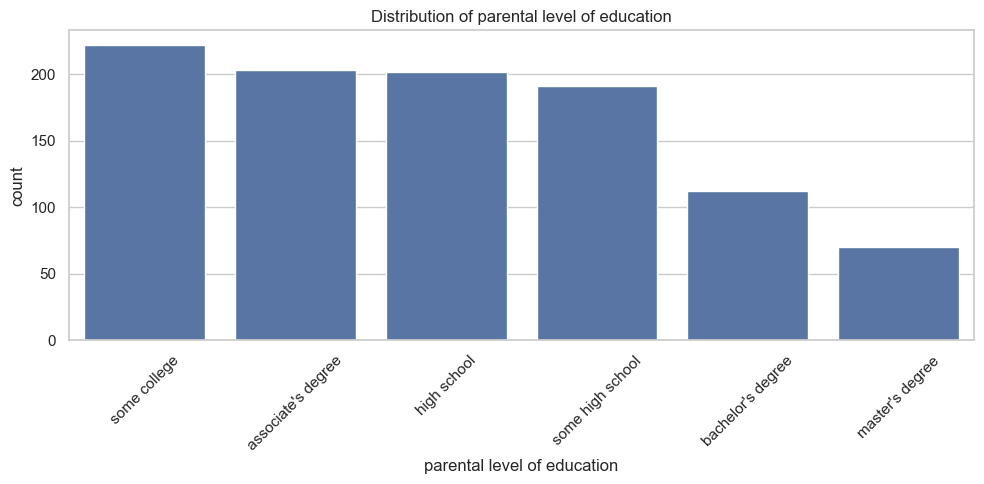

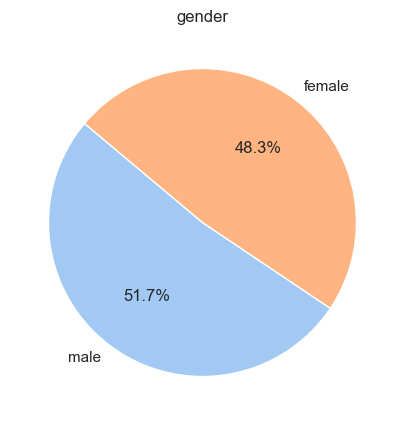

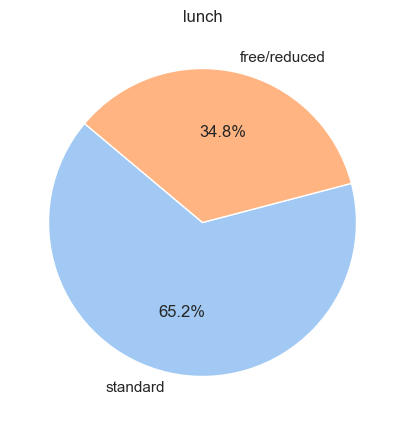

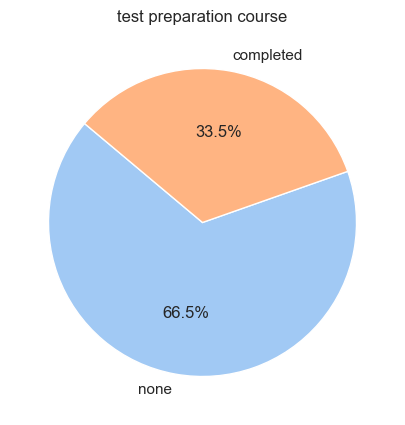

In [5]:
# Distribution of categorical data. Each column plotted
sns.set(style="whitegrid")

# List of categorical columns
more_than_two_cats = [ 'race/ethnicity', 'parental level of education']

# Plotting each categorical column
for col in more_than_two_cats:
    plt.figure(figsize=(10, 5))  # Adjust the size of the figure
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)  # Ordering bars by count
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate x labels for better visibility if needed
    plt.tight_layout()  # Adjust subplot params for better layout
    plt.show()

few_categories_cols = ['gender', 'lunch', 'test preparation course']

for col in few_categories_cols:
    # Data to plot
    sizes = df[col].value_counts().values
    labels = df[col].value_counts().index
    
    # Pie Chart is more suitable option for visulisiation if there is less then two options in column
    plt.figure(figsize=(8, 5))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title(f'{col}')
    plt.show()

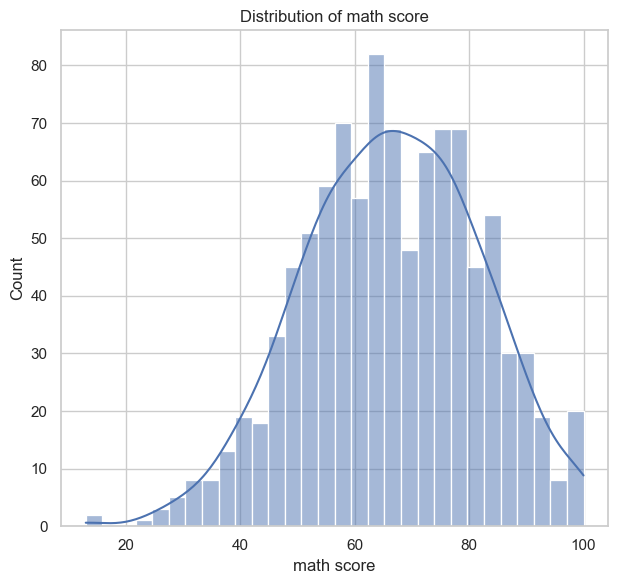

math score - Skewness: -0.151, Kurtosis: -0.225


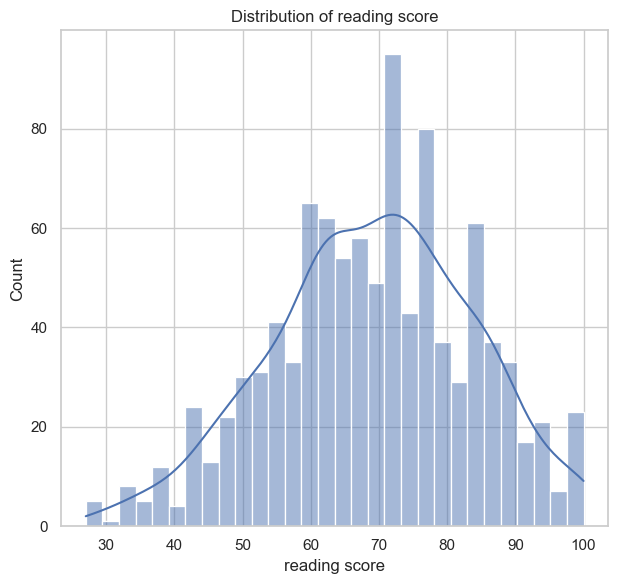

reading score - Skewness: -0.192, Kurtosis: -0.293


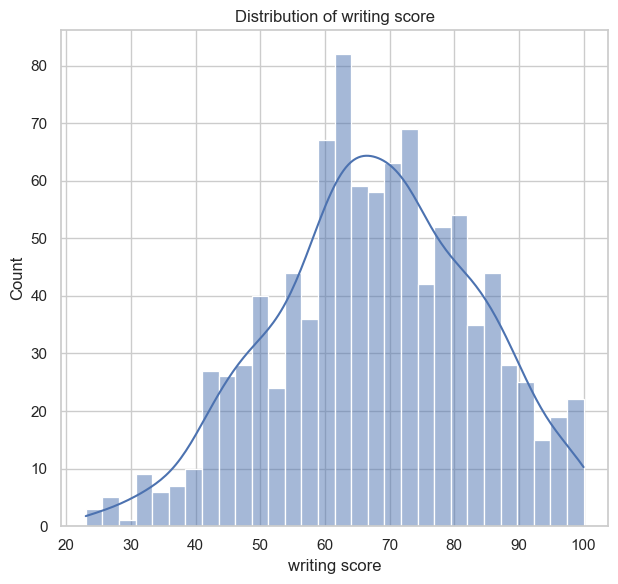

writing score - Skewness: -0.154, Kurtosis: -0.349


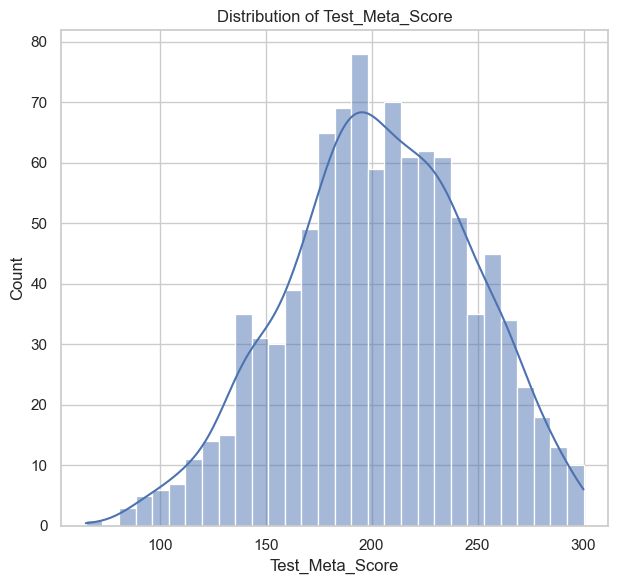

Test_Meta_Score - Skewness: -0.176, Kurtosis: -0.345


In [6]:
numerical_columns = ['math score', 'reading score', 'writing score', 'Test_Meta_Score']
for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    print(f"{col} - Skewness: {round(skewness,3)}, Kurtosis: {round(kurtosis,3)}")

How can we interpret this results? 

First lets recall general rules for skewness and kurtosis:

For skewness:
- A value close to 0 indicates near symmetry.
- A positive value indicates right-skewed data.
- A negative value indicates left-skewed data. 

For kurtosis:
- A value close to 0 indicates a shape similar to the normal distribution (mesokurtic).
- A positive value indicates a leptokurtic distribution (sharper peak and fatter tails).
- A negative value indicates a platykurtic distribution (flatter peak and thinner tails).

1. Distribution of Math Score 
    - Skewness -0.151 indicates that the data is skewed to the left. This suggests that there is a tail of higher math score on the left, that are pulling the mean to the left side.
    - Negative kurtosis with a value of -0.225 indicates implies that the distribution of the data has lighter tails and a flatter peak than a normal distribution. It suggests a lower occurrence of extreme values. 

2. Distribution of Reading Score
    - Slightly more negative skewness than Math Score. This suggests there might be a more student scores pulling the mean below the median, but not dramatically so.
    - The negative kurtosis value indicates that the distribution has a flatter peak and lighter tails than a normal distribution. This suggests that values are moderately spread out.

3. Distribution of Writing Score
    - The negative value suggests a left skew, but again, it's not a very strong skew. There might be a few more writing scores pulling the mean score slightly below the median.
    - The distribution is a bit flatter than a normal distribution and might have lighter tails.

4. Distribution of Test Meta Score
    - Slight negative skewness. The data has a longer tail on the left side.
    - The distribution has lighter tails, and values are spread out more evenly.

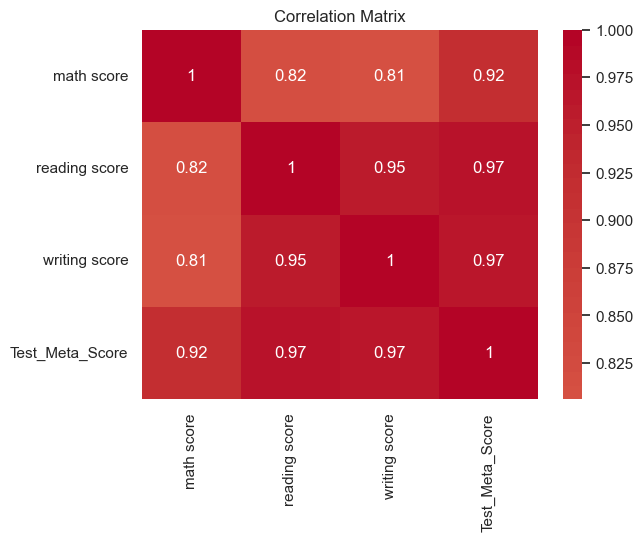

In [7]:
# Correlation of nummrical variables in dataset
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Correlation of categorical data with chi^2
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

p_values = pd.DataFrame(index=cat_cols, columns=cat_cols)

for i in cat_cols:
    for j in cat_cols:
        if i == j:
            p_values.loc[i, j] = '-'
            continue
        
        # Constructing a contingency table
        contingency_table = pd.crosstab(df[i], df[j])
        
        # Computing the Chi-Squared Test
        _, p, _, _ = chi2_contingency(contingency_table)
        
        p_values.loc[i, j] = p
p_values

,gender,race/ethnicity,parental level of education,lunch,test preparation course
gender,-,0.078172,0.005531,0.313671,0.861105
race/ethnicity,0.078172,-,0.764652,0.05567,0.591136
parental level of education,0.005531,0.764652,-,0.463102,0.290073
lunch,0.313671,0.05567,0.463102,-,0.392452
test preparation course,0.861105,0.591136,0.290073,0.392452,-


In [9]:
# exploration of one small p-value
for ge in df.gender.unique():
    print(f'For the Education {ge} distribution is: ')
    print(df['race/ethnicity'][df.gender == f'{ge}'].value_counts())
    print('--------')

For the Education male distribution is: 
race/ethnicity
group C    169
group D    136
group B     91
group E     79
group A     42
Name: count, dtype: int64
--------
For the Education female distribution is: 
race/ethnicity
group C    154
group D    126
group B    114
group E     52
group A     37
Name: count, dtype: int64
--------


Variance in the data 

In [10]:
df.select_dtypes(include=['int64']).var()

math score          237.248432
reading score       217.187183
writing score       243.390747
Test_Meta_Score    1895.969473
dtype: float64

In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns

categorical_variance = {}

for col in categorical_columns:
    prob = df[col].value_counts(normalize=True)  # get probabilities
    var = sum(prob * (1 - prob))  # compute variance for each category and sum them up
    categorical_variance[col] = var

categorical_variance

{'gender': 0.499422,
 'race/ethnicity': 0.7616,
 'parental level of education': 0.814778,
 'lunch': 0.453792,
 'test preparation course': 0.44555}